In [2]:
# from tensorflow.python.client import device_lib
# device_lib.list_local_devices()

In [45]:
import os
import librosa
import librosa.display
import numpy as np
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras import backend as K
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from python_speech_features import base as speech
from scipy import signal as s
%matplotlib inline

In [2]:
classes = np.array(['angry', 'calm', 'disgust', 'fearful', 'happy', 'sad', 'surprised']) # no neutral

In [19]:
all_mel_specs = []
all_class_labels = []

path = 'RAVDESS/0_all_speech/'

min_sig_len = 140941
max_sig_len = 253053

num_of_classes = len(classes)

In [20]:
for file in os.listdir(path):
    class_label = file.split('-')[0]
    
    if not 'neutral' in class_label:
        signal, samplerate = librosa.core.load(path+file, sr=48000)
        
        class_label = np.where(classes == class_label)[0][0]
        
        signal = np.pad(signal,(0,max_sig_len-len(signal)), mode='constant')
    
        all_mel_specs.append(librosa.feature.melspectrogram(signal))
        all_class_labels.append(class_label)
        
        break

In [33]:
b = librosa.feature.melspectrogram(signal)

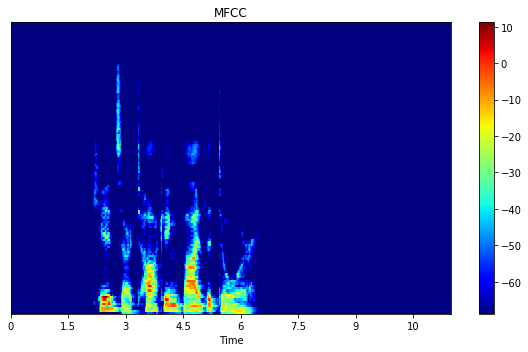

In [43]:
plt.figure(figsize=(8,5))
librosa.display.specshow(librosa.amplitude_to_db(b), x_axis='time',cmap='jet')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

In [ ]:
signal.spectrogram()

In [44]:
librosa.amplitude_to_db??

In [42]:
# librosa.amplitude_to_db(b)

In [5]:
# all_mel_specs = np.array(all_mel_specs) 
# all_class_labels = np.array(all_class_labels)

all_mel_specs.shape, all_class_labels.shape

((1344, 128, 495), (1344,))

In [29]:
os.listdir()

['test.png',
 'spectr_vs_cepstr.ipynb',
 'mfcc_generating.ipynb',
 '.ipynb_checkpoints',
 'RAVDESS',
 'resources',
 'pad0_melspec_minmax_crossentropy.py',
 '2_mfccs_conv1D.ipynb',
 '.git',
 'spectrograms_generating.ipynb',
 '0_mfcc_speech_only.ipynb',
 '.gitignore',
 '1_spectrograms',
 'mel_spectrograms.pkl',
 'spectrograms.ipynb',
 'test_2.ipynb',
 'start_try_1.ipynb',
 'computing_MFCC_experiments.ipynb',
 'files_renaming.ipynb',
 'computing_MFCC.ipynb',
 'test_1.ipynb',
 '1_with_spectrograms.ipynb']

In [31]:
all_mel_specs[0]

array([[0.00000000e+00, 0.00000000e+00, 8.02950964e-12, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.34259199e-12, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.77891016e-12, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 8.76704104e-12, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.75237287e-12, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.75686317e-12, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [26]:
b

[array([[0.00000000e+00, 0.00000000e+00, 8.02950964e-12, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 8.34259199e-12, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 9.77891016e-12, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 8.76704104e-12, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 8.75237287e-12, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 8.75686317e-12, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])]

In [6]:
min_ = np.amax(all_mel_specs)
max_ = np.amin(all_mel_specs)

In [7]:
rescaled = (all_mel_specs - min_) / (max_ - min_)

In [8]:
rescaled.shape

(1344, 128, 495)

In [9]:
rescaled.shape[0], rescaled.shape[1], rescaled.shape[2]

(1344, 128, 495)

In [10]:
X = rescaled.reshape(rescaled.shape[0], rescaled.shape[1], rescaled.shape[2], 1)

In [12]:
Y = keras.utils.to_categorical(all_class_labels, num_of_classes)

In [13]:
np.random.seed(7)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [15]:
model = models.Sequential()

model.add(layers.Conv2D(32,  activation='relu', kernel_size=(3, 3),padding='valid', input_shape=X.shape[1:]))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Dropout(0.2))

# model.add(layers.Conv2D(32,  activation='relu', kernel_size=(2, 2),padding='valid'))
# model.add(layers.MaxPool2D(pool_size=(2,2)))
# model.add(layers.Dropout(0.2))

# model.add(layers.Conv2D(64,  activation='relu', kernel_size=(1, 1),padding='valid'))
# model.add(layers.MaxPool2D(pool_size=(2,2)))
# model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(num_of_classes))
model.add(layers.Lambda(lambda x: K.tf.nn.softmax(x)))

In [16]:
# model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

# sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy',])

In [17]:
history = model.fit(X_train, Y_train, validation_split=0.25, batch_size=35, epochs=50, verbose=True)

Train on 756 samples, validate on 252 samples
Epoch 1/50


ResourceExhaustedError: OOM when allocating tensor with shape[35,32,126,493]
	 [[Node: training/Adam/gradients/max_pooling2d_1/MaxPool_grad/MaxPoolGrad = MaxPoolGrad[T=DT_FLOAT, _class=["loc:@max_pooling2d_1/MaxPool"], data_format="NHWC", ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1], _device="/job:localhost/replica:0/task:0/device:GPU:0"](conv2d_1/Relu, max_pooling2d_1/MaxPool, training/Adam/gradients/AddN_1)]]

Caused by op 'training/Adam/gradients/max_pooling2d_1/MaxPool_grad/MaxPoolGrad', defined at:
  File "/home/lovely/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/lovely/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-16ec5aef71bf>", line 1, in <module>
    history = model.fit(X_train, Y_train, validation_split=0.25, batch_size=35, epochs=50, verbose=True)
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/keras/models.py", line 1002, in fit
    validation_steps=validation_steps)
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/keras/engine/training.py", line 1682, in fit
    self._make_train_function()
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/keras/engine/training.py", line 992, in _make_train_function
    loss=self.total_loss)
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/keras/optimizers.py", line 445, in get_updates
    grads = self.get_gradients(loss, params)
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/keras/optimizers.py", line 78, in get_gradients
    grads = K.gradients(loss, params)
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 2519, in gradients
    return tf.gradients(loss, variables, colocate_gradients_with_ops=True)
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py", line 581, in gradients
    grad_scope, op, func_call, lambda: grad_fn(op, *out_grads))
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py", line 353, in _MaybeCompile
    return grad_fn()  # Exit early
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py", line 581, in <lambda>
    grad_scope, op, func_call, lambda: grad_fn(op, *out_grads))
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/nn_grad.py", line 555, in _MaxPoolGrad
    data_format=op.get_attr("data_format"))
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 3083, in _max_pool_grad
    data_format=data_format, name=name)
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

...which was originally created as op 'max_pooling2d_1/MaxPool', defined at:
  File "/home/lovely/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
[elided 18 identical lines from previous traceback]
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-304774c8656f>", line 4, in <module>
    model.add(layers.MaxPool2D(pool_size=(2,2)))
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/keras/models.py", line 522, in add
    output_tensor = layer(self.outputs[0])
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/keras/engine/topology.py", line 619, in __call__
    output = self.call(inputs, **kwargs)
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/keras/layers/pooling.py", line 158, in call
    data_format=self.data_format)
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/keras/layers/pooling.py", line 221, in _pooling_function
    pool_mode='max')
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 3663, in pool2d
    data_format=tf_data_format)
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/nn_ops.py", line 1958, in max_pool
    name=name)
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 2806, in _max_pool
    data_format=data_format, name=name)
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/home/lovely/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[35,32,126,493]
	 [[Node: training/Adam/gradients/max_pooling2d_1/MaxPool_grad/MaxPoolGrad = MaxPoolGrad[T=DT_FLOAT, _class=["loc:@max_pooling2d_1/MaxPool"], data_format="NHWC", ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1], _device="/job:localhost/replica:0/task:0/device:GPU:0"](conv2d_1/Relu, max_pooling2d_1/MaxPool, training/Adam/gradients/AddN_1)]]


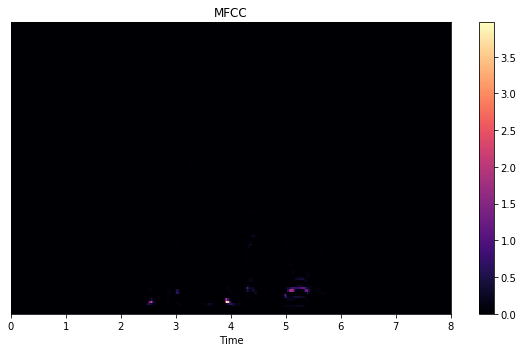

In [38]:
plt.figure(figsize=(8, 5))
librosa.display.specshow(melspec, x_axis='time',cmap='magma')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

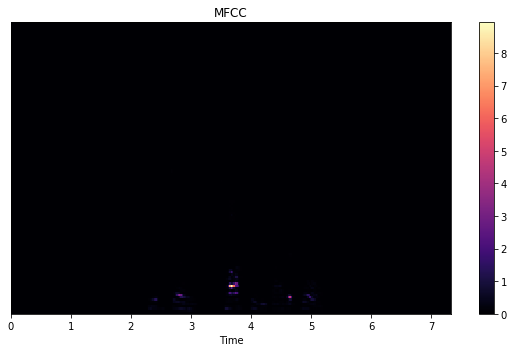

In [32]:
plt.figure(figsize=(8, 5))
librosa.display.specshow(melspec, x_axis='time',cmap='magma')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

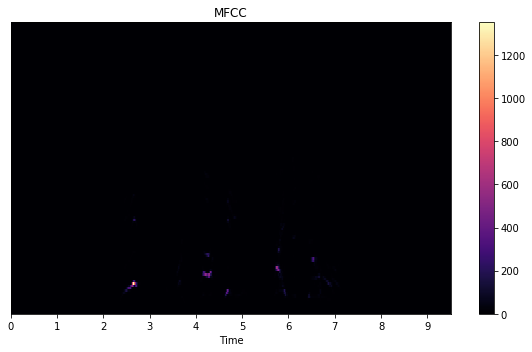

In [26]:
plt.figure(figsize=(8, 5))
librosa.display.specshow(melspec, x_axis='time',cmap='magma')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

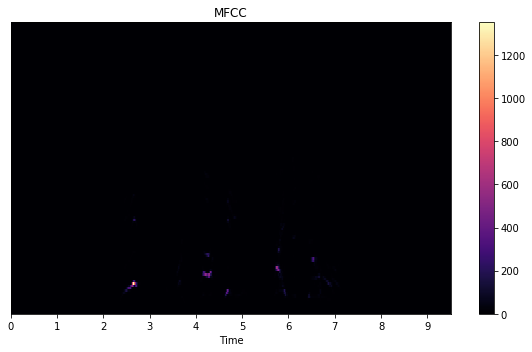

In [27]:
plt.figure(figsize=(8,5))
librosa.display.specshow(melspec, x_axis='time',cmap='magma')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()